### **Aim**  
The motive of this assignment is to make predictions using **Linear Regression**. To make sure you truly understand how the underlying algorithm works, you are to implement it from scratch.

### Generating the dataset  
Run the cell below to create the dataset. It further splits the available data into training and testing. Please do not edit this cell.


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=20, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

### Visualizing the data  
Use `matplotlib` to visualize the given data.

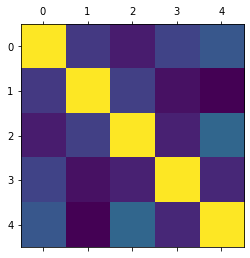

In [ ]:
import matplotlib.pyplot as plt
corr=np.corrcoef(X_train,rowvar=False)
plt.matshow(corr);



# Your code here

You should be able to see the linear relations between `y` and the features in vector `X`.

### Gradient Descent Review  
1. ####  Cost function
Define the `cost function` to measure the difference between predictions and target outputs. Here, we are working with first degree polynomial, so derivatives are easy to calculate. ( Linear function `y = wx +b` )  

$$Error = \frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N (y_i - (x_iw+b))^2 $$  

  where `N` is the number of samples  
    


2. #### Compute the derivative
$$\frac{\delta Error}{\delta w} = \frac{2}{N}\sum_{i=1}^N -x_i(y_i -(m  x_i +b ))  $$
$$\frac{\delta Error}{\delta b} = \frac{2}{N}\sum_{i=1}^N -(y_i -(m  x_i +b ))  $$
3. <h4>Update current parameters</h4>
$$ w:= w- learning\_rate \cdot \frac{\delta Error}{\delta w}   $$ 
$$ b:= b- learning\_rate \cdot \frac{\delta Error}{\delta b}   $$ 
4. <h4>Repeat until it fits good enough</h4>


### Model definition

Complete the functions in the class below. Hints provided at appropriate places.

In [ ]:
import numpy as np

class LinearRegression:

    # The __init__ is called when we make any object of our class. Here, you are to specify the default values for 
    # Learning Rate, Number of Iterations, Weights and Biases. It doesn't return anything.
    # Hint: Google what a `self pointer` is and figure out how it can be used here.
    def __init__(self, learning_rate=0.001, n_iters=1000,w=np.random.rand(X.shape[1]),b=1):
      self.learning_rate=learning_rate
      self.n_iters=n_iters
      self.w=w
      self.b=b  




        #pass  # Uncomment this when you're done with this function


    # The following function would be the heart of the model. This is where the training would happen. 
    # You're supposed to iterate and keep on updating the weights and biases according to the steps of Gradient Descent.
    def fit(self, X, y):
    
      n=X.shape[0]
      feature_count = X.shape[1]
      for i in range(self.n_iters):
        pred=np.matmul(X,self.w)+self.b
        #error=np.sum(np.dot(pred-y,pred-y))/n
        derivative = np.zeros(feature_count)
        for j in range(feature_count):
          test=np.dot(X[:,j],(y-pred))
          derivative[j] = -2*np.sum(np.dot(X[:,j],(y-pred)),axis=None)/n
        derivative_b=-2*np.sum(y-pred)/n 
        self.w=self.w-self.learning_rate*derivative
        self.b=self.b-self.learning_rate*derivative_b
      
        

        # Gradient Descent code goes here

        #pass  # Uncomment this when you're done with this function
        
        
    # This function will be called after our model has been trained and we are predicting on unseen data
    # What is our prediction? Just return that
    def predict(self, X):
        # Code goes here
        return np.matmul(X,self.w)+self.b
       

        #pass  # Uncomment this when you're done with this function

### Initializing, Training & Predictions

In [ ]:
# Now, we make an object of our custom class.
regressor = LinearRegression() # You may pass the custom parameters or let the default values take it ahead

# Call the fit method on the object to train (pass appropriate part of dataset)


# Now, let's see our what our model predicts
regressor.fit(X_train,y_train)
predictions = regressor.predict(X_test) # pass appropriate part of dataset

### Evaluate the model   

Return [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) & [R2 Score](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy) from the functions below.

In [ ]:
def mean_squared_error(y_true, y_pred):
  return np.sum(np.dot(y_true-y_pred,y_true-y_pred))/y_true.shape[0]

       # return the mean squared error
       #pass  # Uncomment this when you're done with this function


def r2_score(y_true, y_pred):
  rss=np.sum(np.dot(y_true-y_pred,y_true-y_pred))
  tss=np.sum(np.dot(y_true-np.mean(y_true),y_true-np.mean(y_true)))
  return 1-rss/tss

  
      # return the r2 score
      #pass  # Uncomment this when you're done with this function
          

mse = mean_squared_error(y_test,predictions) # Pass appropriate parts of dataset
print("MSE:", mse)

accu = r2_score(y_test,predictions) # Pass appropriate parts of dataset
print("Accuracy:", accu)

MSE: 655.5771899128939
Accuracy: 0.9380225238158303


In [ ]:
np.mean(predictions)

38.07692227576615